In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Univariate analysis

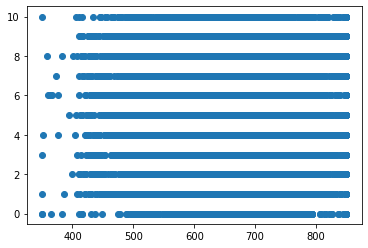

In [4]:
plt.scatter(df['CreditScore'] ,df['Tenure'])

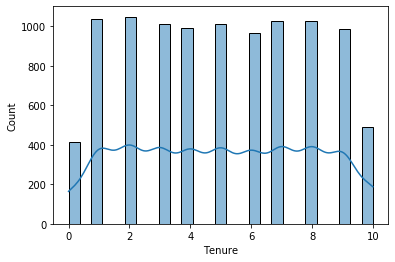

In [6]:
sns.histplot(df['Tenure'],kde=True)

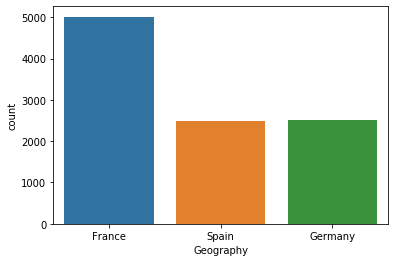

In [9]:
sns.countplot(x ='Geography', data = df)

## Bivariate analysis

In [10]:
df[['Age','CreditScore','EstimatedSalary']].corr()

,Age,CreditScore,EstimatedSalary
Age,1.000000,-0.003965,-0.007201
CreditScore,-0.003965,1.000000,-0.001384
EstimatedSalary,-0.007201,-0.001384,1.000000


(0, 20000)

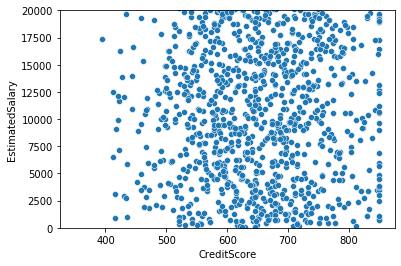

In [13]:
sns.scatterplot(x=df.CreditScore,y=df.EstimatedSalary)
plt.ylim(0,20000)

In [16]:
pd.crosstab(df.Gender,df.HasCrCard,margins=True)['All']

Gender
Female     4543
Male       5457
All       10000
Name: All, dtype: int64

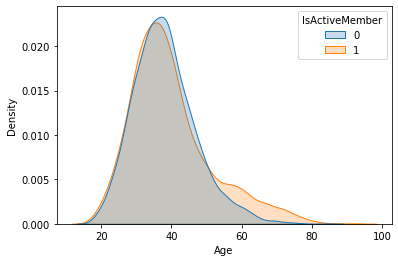

In [15]:
sns.kdeplot(data=df,x='Age',hue='IsActiveMember',fill=True)

## Multivariate Analysis

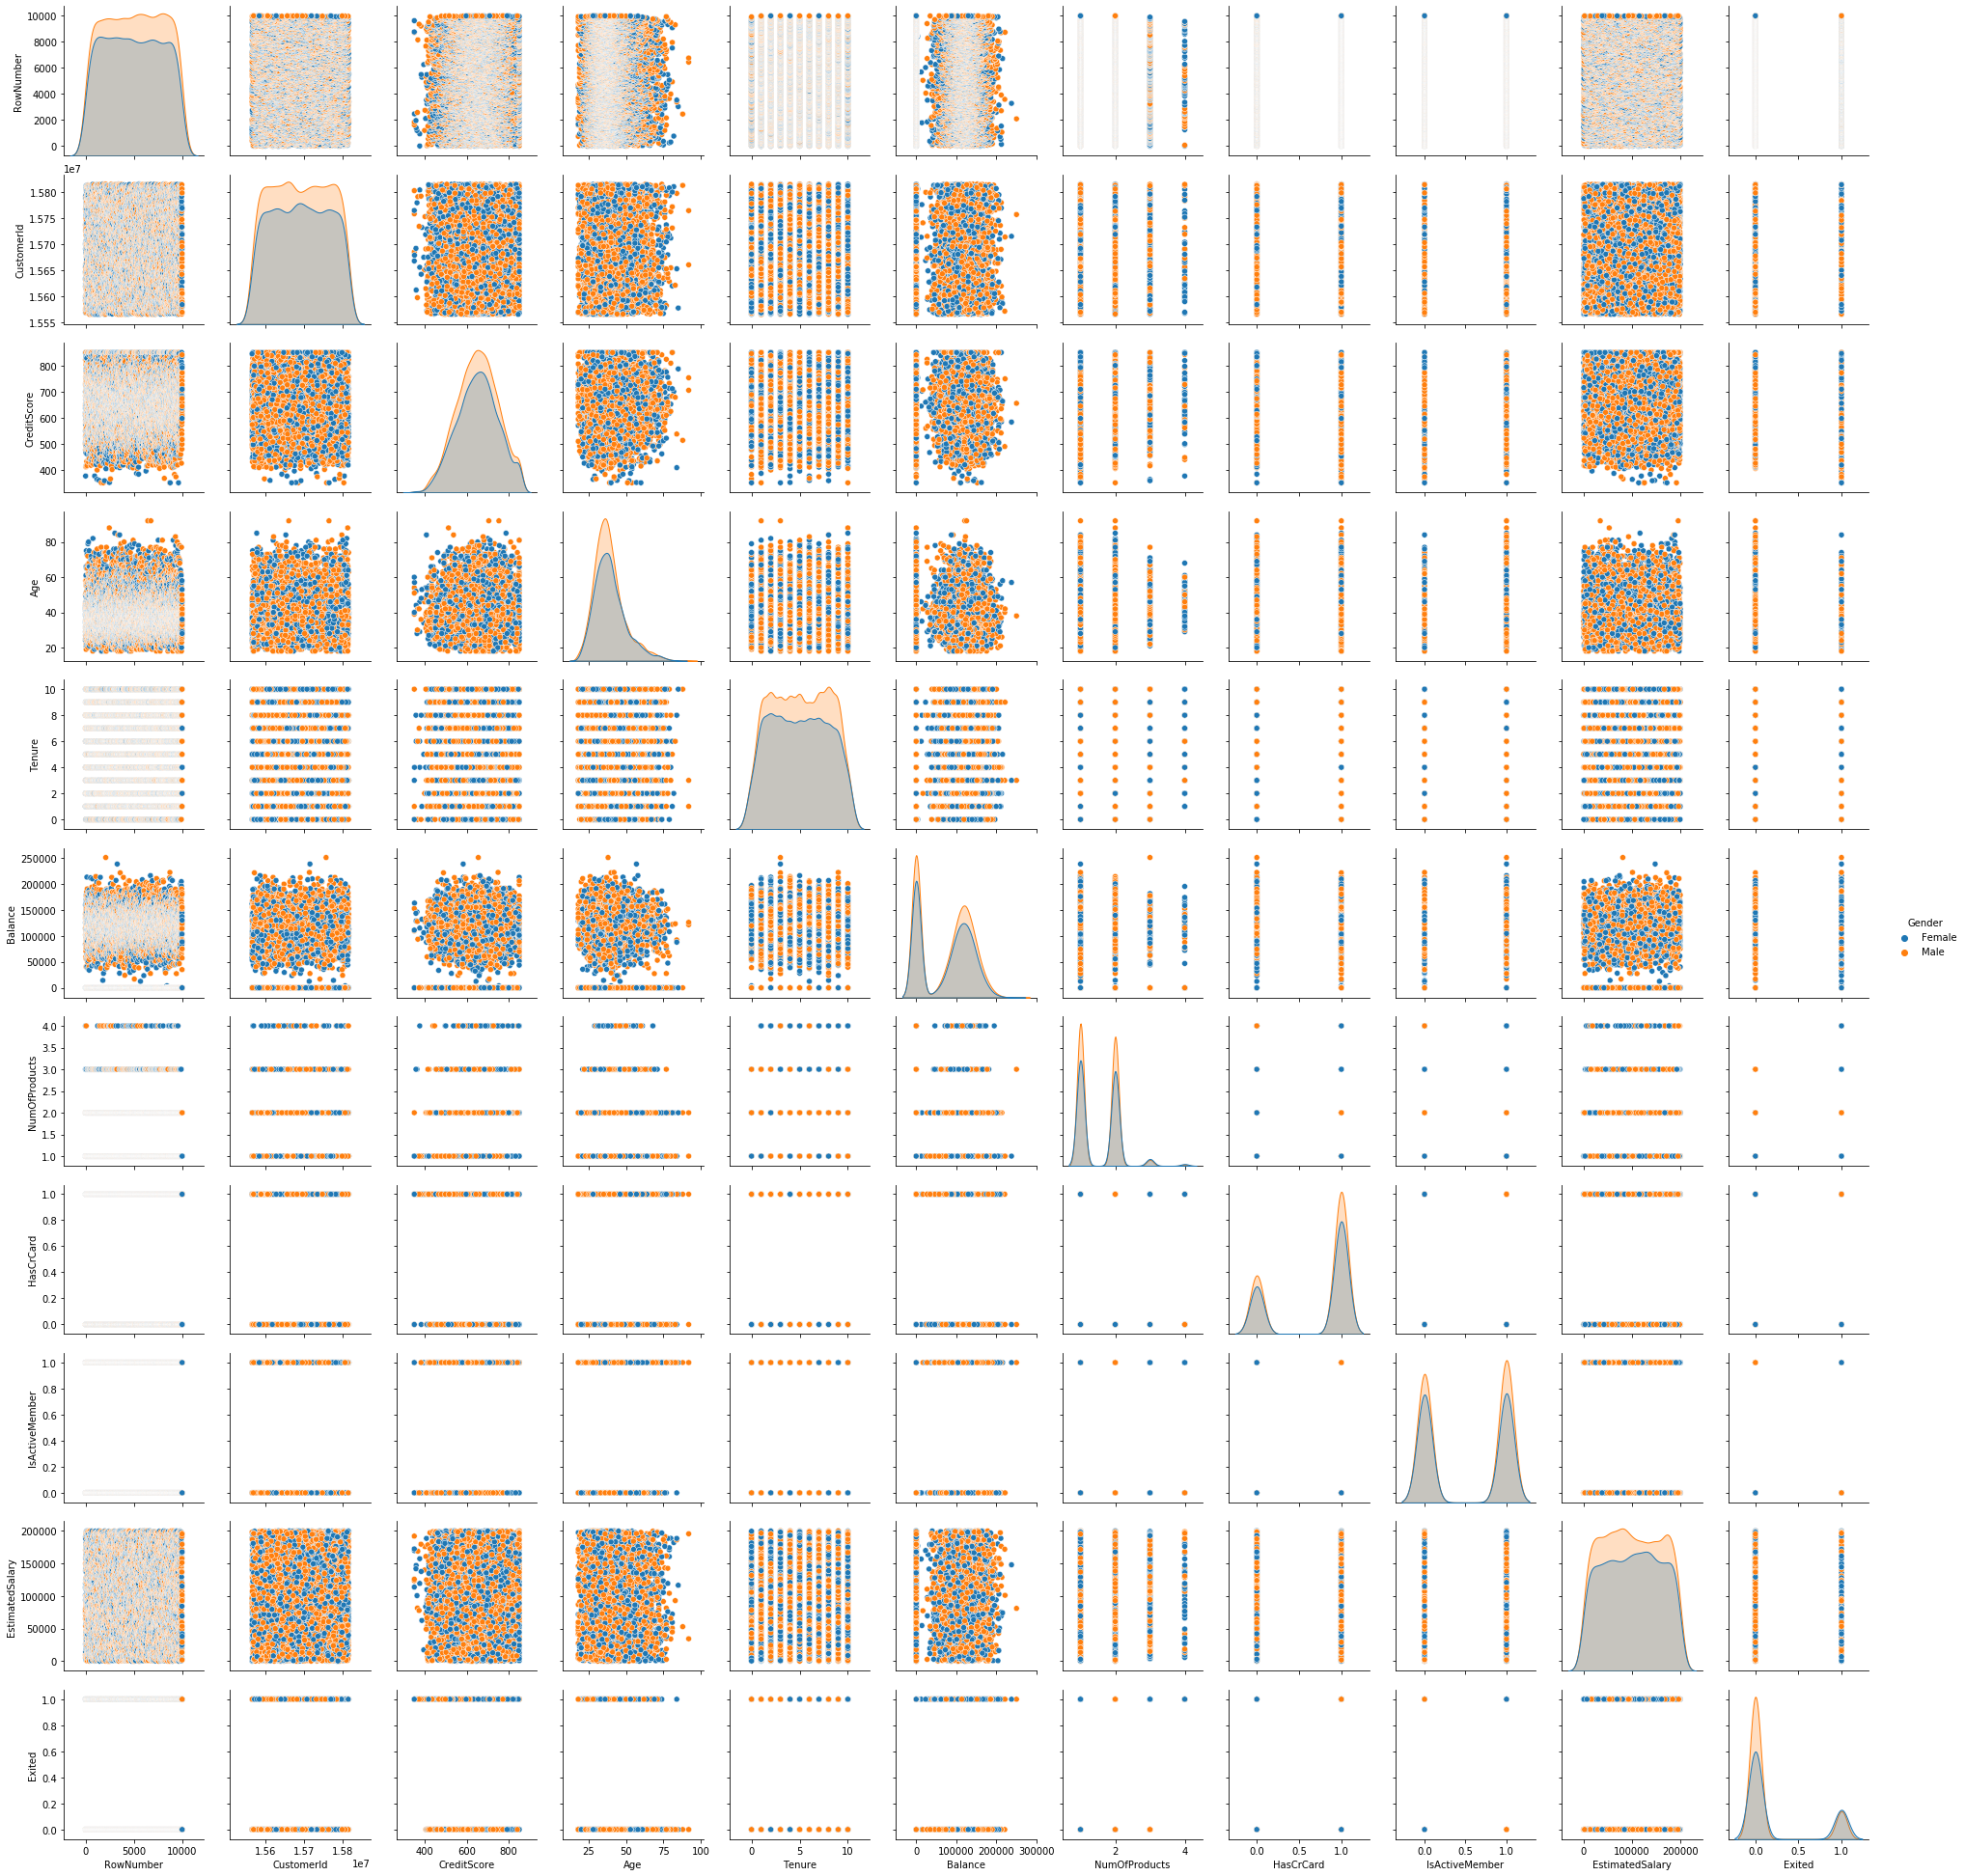

In [18]:
sns.pairplot(data=df,hue='Gender')

## Perform descriptive statistics on the dataset

In [21]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Handle the Missing values

### No Null values present in this dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Find the outliers and replace the outliers

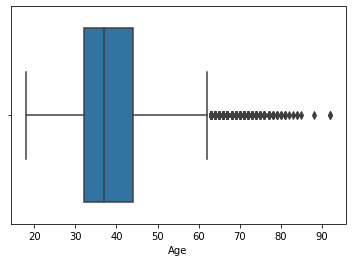

In [25]:
sns.boxplot(x=df['Age'])

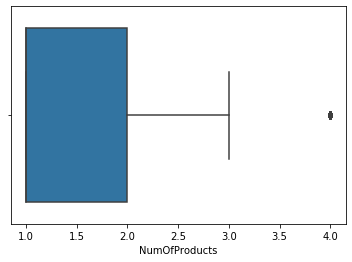

In [26]:
sns.boxplot(x=df['NumOfProducts'])

In [28]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64


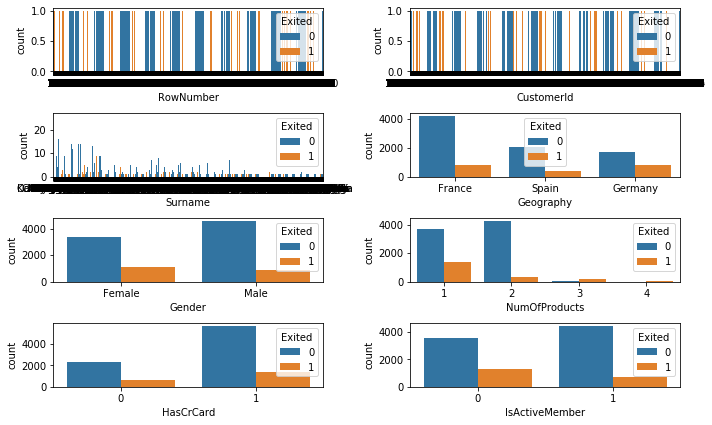

In [30]:
categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])

rows = int(np.ceil(categorical.shape[1] / 2)) - 1

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       
        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()

In [31]:
df = df.loc[pdDf['CreditScore'] > 400]
df = df.loc[pdDf['Age'] < 87]
df = df.loc[pdDf['Balance'] < 220000]
df = df.loc[pdDf['NumOfProducts'] < 3]

NameError: name 'pdDf' is not defined

## Check for Categorical columns and perform encoding

In [32]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [33]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [34]:
df['Surname'].value_counts()

Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Keane        1
Farber       1
O'Connor     1
Baddeley     1
Kiernan      1
Name: Surname, Length: 2932, dtype: int64

In [35]:
gen_n = {"Male":0,"Female":1}
df = df.replace(gen_n)

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [37]:
geo_n = {"France":0,"Spain":1,"Germany":2}
df = df.replace(geo_n)

In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [39]:
temp = df['Surname'].unique()
di = {}
i=0
for x in temp:
  di[x] = i
  i=i+1

In [40]:
df = df.replace(di)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


## Split the data into dependent and independent variables

In [41]:
X = df.drop(columns=['Exited'])
y = df['Exited']

## Scale the independent variables

In [42]:
X = X.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [43]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range = (0,1))
temp = minmax.fit_transform(X)
cols = X.columns
X = pd.DataFrame(data=temp,columns=cols)

In [44]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.5,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,1.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.5,1.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


## Split the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [47]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7681,0.582,0.0,0.0,0.202703,0.2,0.582681,0.333333,1.0,1.0,0.278953
9031,0.382,0.0,0.0,0.283784,0.7,0.000000,0.333333,1.0,0.0,0.099067
3691,0.480,0.0,1.0,0.783784,0.5,0.641614,0.000000,0.0,1.0,0.069192
202,0.332,0.5,0.0,0.432432,0.5,0.000000,0.000000,0.0,1.0,0.730742
5625,0.316,0.0,1.0,0.567568,0.7,0.570997,0.000000,1.0,1.0,0.647818
...,...,...,...,...,...,...,...,...,...,...
9225,0.488,1.0,1.0,0.189189,0.4,0.478581,0.333333,1.0,1.0,0.814829
4859,0.888,0.5,1.0,0.054054,0.4,0.456122,0.000000,1.0,1.0,0.538759
3264,0.776,0.0,0.0,0.229730,0.5,0.642787,0.333333,1.0,0.0,0.907178
9845,0.480,0.5,1.0,0.270270,0.9,0.000000,0.333333,1.0,1.0,0.743764


In [48]:
y_train

7681    1
9031    0
3691    0
202     1
5625    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7000, dtype: int64